 # Peer-graded Assignment: Capstone Project - Car accident severity (Week 2) RANGA


In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

A full report consisting of all of the following components (15 marks):
Introduction where you discuss the business problem and who would be interested in this project.
Data where you describe the data that will be used to solve the problem and the source of the data.
Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
Results section where you discuss the results.
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
Conclusion section where you conclude the report.
2. A link to your Notebook on your Github repository pushed showing your code. (15 marks)

3. Your choice of a presentation or blogpost. (10 marks)

Here are examples of previous outstanding submissions that should give you an idea of what your report would look like, what your notebook would look like in terms of clean, clear, and well-commented code, and what your presentation would look like or your blogpost would look like:

Report: https://cocl.us/coursera_capstone_report
Notebook: https://cocl.us/coursera_capstone_notebook
Presentation: https://cocl.us/coursera_capstone_presentation
Blogpost: https://cocl.us/coursera_capstone_blogpost 

Preprocessing¶
Make the data to be balanced
Select data to address the following questions:
Is there any location correlated with large severity?
what type of collision is the more dangerous?
Is it more safe to ride a bike, drive a car, or walk?
which time and which day would have more accidents? weekdays or weekends?
which type of junction?
what is the data type of my dataset?
Is there any empty data? is there any null data? remove or guess?
Is the data balance now?

In [1]:
import numpy as np
import pandas as pd

Seattle_AccidentData = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
Seattle_AccidentData.head()
    

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
Seattle_AccidentData.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [4]:
Car_Accidents = Seattle_AccidentData[['SEVERITYCODE','ADDRTYPE','WEATHER','SPEEDING','ROADCOND','VEHCOUNT','PERSONCOUNT']]


In [5]:
Car_Accidents.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 7 columns):
SEVERITYCODE    194673 non-null int64
ADDRTYPE        192747 non-null object
WEATHER         189592 non-null object
SPEEDING        9333 non-null object
ROADCOND        189661 non-null object
VEHCOUNT        194673 non-null int64
PERSONCOUNT     194673 non-null int64
dtypes: int64(3), object(4)
memory usage: 10.4+ MB


Data Preparation

For ease of use we will drop the columns we do not need from the dataset, i.e., columns that do not have values or where the values are unknown. We will drop Speeding entirely because it is missing over 180,000 values and we cannot predict or replace then. For Weather, Roadcond and Addrtype columns we will just drop the values where there is no information.

In [6]:
Car_Accidents['SPEEDING'].value_counts()
    

Y    9333
Name: SPEEDING, dtype: int64

In [7]:
Car_Accidents.drop('SPEEDING', axis = 1, inplace = True)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
Car_Accidents = Car_Accidents[~Car_Accidents['WEATHER'].isnull()]
Car_Accidents = Car_Accidents[~Car_Accidents['ROADCOND'].isnull()]
Car_Accidents = Car_Accidents[~Car_Accidents['ADDRTYPE'].isnull()]

In [9]:
Car_Accidents.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT
0,2,Intersection,Overcast,Wet,2,2
1,1,Block,Raining,Wet,2,2
2,1,Block,Overcast,Dry,3,4
3,1,Block,Clear,Dry,3,3
4,2,Intersection,Raining,Wet,2,2


In [10]:
Car_Accidents.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 187727 entries, 0 to 194672
Data columns (total 6 columns):
SEVERITYCODE    187727 non-null int64
ADDRTYPE        187727 non-null object
WEATHER         187727 non-null object
ROADCOND        187727 non-null object
VEHCOUNT        187727 non-null int64
PERSONCOUNT     187727 non-null int64
dtypes: int64(3), object(3)
memory usage: 10.0+ MB


In [11]:
Car_Accidents['WEATHER'].value_counts()


Clear                       110607
Raining                      33000
Overcast                     27572
Unknown                      14096
Snowing                        902
Other                          796
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [12]:
Car_Accidents['ADDRTYPE'].value_counts()


Block           123481
Intersection     63504
Alley              742
Name: ADDRTYPE, dtype: int64

In [13]:
Car_Accidents['ROADCOND'].value_counts()


Dry               123867
Wet                47256
Unknown            14043
Ice                 1193
Snow/Slush           995
Other                125
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

We notice some unknown data type in WEATHER and ROADCOND columns, so there is still some cleaning of the data to do.



In [14]:
Car_Accidents = Car_Accidents[Car_Accidents['ROADCOND'] != 'Unknown']
Car_Accidents = Car_Accidents[Car_Accidents['WEATHER'] != 'Unknown']

In [15]:
Car_Accidents.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 172242 entries, 0 to 194672
Data columns (total 6 columns):
SEVERITYCODE    172242 non-null int64
ADDRTYPE        172242 non-null object
WEATHER         172242 non-null object
ROADCOND        172242 non-null object
VEHCOUNT        172242 non-null int64
PERSONCOUNT     172242 non-null int64
dtypes: int64(3), object(3)
memory usage: 9.2+ MB


In [16]:
Car_Accidents.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT
0,2,Intersection,Overcast,Wet,2,2
1,1,Block,Raining,Wet,2,2
2,1,Block,Overcast,Dry,3,4
3,1,Block,Clear,Dry,3,3
4,2,Intersection,Raining,Wet,2,2


#### The above report confirms that the data is now ready for use and we can begin our analysis



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
Car_Accidents = pd.concat([Car_Accidents,pd.get_dummies(Car_Accidents['ADDRTYPE'])], axis=1)
Car_Accidents = pd.concat([Car_Accidents,pd.get_dummies(Car_Accidents['WEATHER'])], axis=1)
Car_Accidents = pd.concat([Car_Accidents,pd.get_dummies(Car_Accidents['ROADCOND'])], axis=1)

In [19]:
#Car_Accidents.drop(['ADDRTYPE','WEATHER','ROADCOND'],axis=1,inplace = True)


In [20]:
Car_Accidents.head()                                                                                        

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT,Alley,Block,Intersection,Blowing Sand/Dirt,...,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,2,Intersection,Overcast,Wet,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,Block,Raining,Wet,2,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,Block,Overcast,Dry,3,4,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,Block,Clear,Dry,3,3,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,Intersection,Raining,Wet,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
Car_Accidents_X = Car_Accidents.drop('SEVERITYCODE',axis=1)
Car_Accidents_Y = Car_Accidents['SEVERITYCODE'].values

In [22]:
Car_Accidents_X.head()                                                                                        

,ADDRTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,...,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,Intersection,Overcast,Wet,2,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Block,Raining,Wet,2,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Block,Overcast,Dry,3,4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Block,Clear,Dry,3,3,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,Intersection,Raining,Wet,2,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
Car_Accidents_Y 

array([2, 1, 1, ..., 2, 2, 1])

In [24]:
import matplotlib as mpl
 
def demo(sty):
    mpl.style.use(sty)
    
demo('seaborn')

Text(0.5, 1.0, 'Number of Vehicles Involved in Accidents')

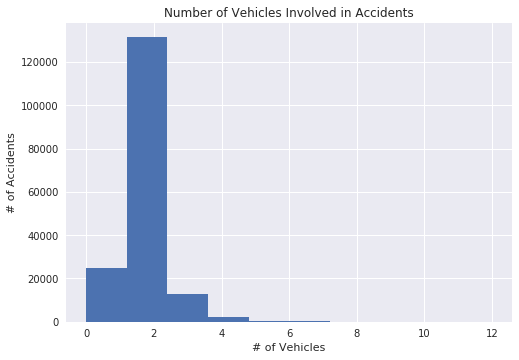

In [25]:
plt.hist(Car_Accidents.VEHCOUNT)
plt.xlabel('# of Vehicles')
plt.ylabel('# of Accidents')
plt.title('Number of Vehicles Involved in Accidents')
 

In [26]:
Car_Accidents.VEHCOUNT.value_counts()


2     131484
1      24789
3      12650
4       2382
5        522
0        193
6        143
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

Text(0.5, 1.0, 'Number of Vehicles involved in Accidents')

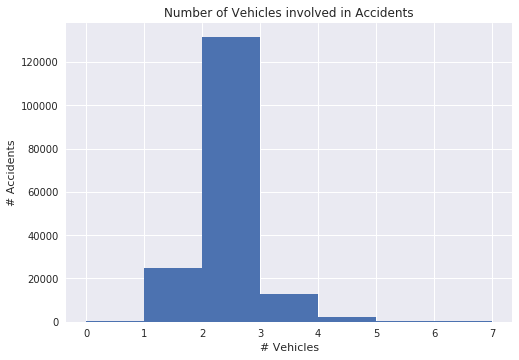

In [27]:
bins = np.arange(Car_Accidents.PERSONCOUNT.min(), 8, 1)
plt.hist(Car_Accidents.VEHCOUNT,bins = bins)
plt.xlabel('# Vehicles')
plt.ylabel('# Accidents')
plt.title('Number of Vehicles involved in Accidents')

Text(0.5, 1.0, 'No of people in Accidents')

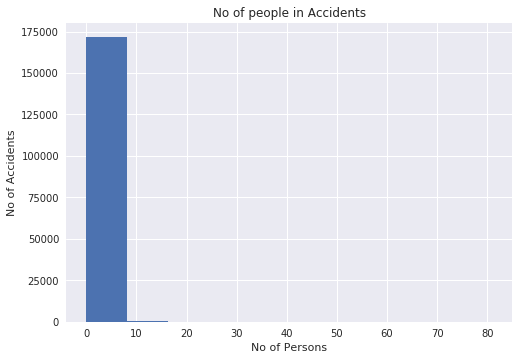

In [28]:
plt.hist(Car_Accidents.PERSONCOUNT)
plt.xlabel('No of Persons')
plt.ylabel('No of Accidents')
plt.title('No of people in Accidents')

In [29]:
Car_Accidents.PERSONCOUNT.value_counts()


2     95947
3     34189
4     14214
1     11182
5      6493
0      5321
6      2673
7      1118
8       528
9       213
10      128
11       55
12       33
13       21
14       19
15       11
17       11
16        8
44        6
18        6
20        6
25        6
19        5
26        4
22        4
27        3
28        3
29        3
47        3
32        3
34        3
37        3
23        2
21        2
24        2
30        2
36        2
57        1
31        1
35        1
39        1
41        1
43        1
48        1
53        1
54        1
81        1
Name: PERSONCOUNT, dtype: int64

Text(0.5, 1.0, 'No of people in Accidents')

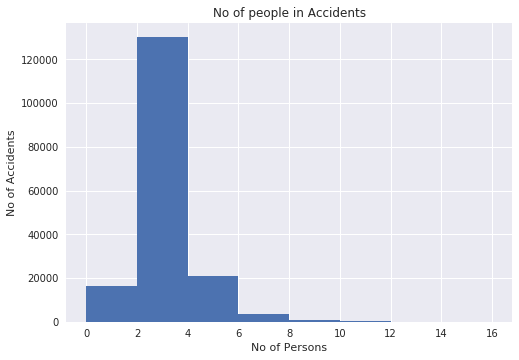

In [30]:
bins = np.arange(Car_Accidents.PERSONCOUNT.min(), 17, 2)
plt.hist(Car_Accidents.PERSONCOUNT,bins = bins)
plt.xlabel('No of Persons')
plt.ylabel('No of Accidents')
plt.title('No of people in Accidents')

In [31]:
bins
Car_Accidents.head()                                                                                        


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT,Alley,Block,Intersection,Blowing Sand/Dirt,...,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,2,Intersection,Overcast,Wet,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,Block,Raining,Wet,2,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,Block,Overcast,Dry,3,4,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,Block,Clear,Dry,3,3,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,Intersection,Raining,Wet,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'No of Accidents in relation to the location')

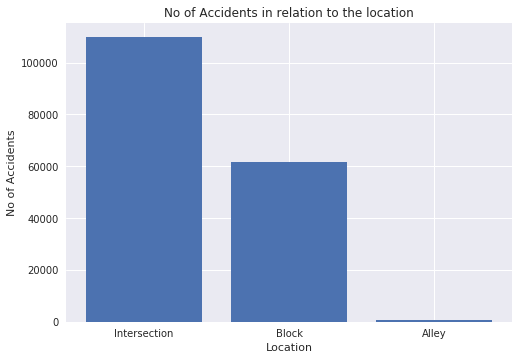

In [32]:
X = Car_Accidents.ADDRTYPE.unique()
Data = Car_Accidents.ADDRTYPE.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Location')
plt.ylabel('No of Accidents')
plt.title('No of Accidents in relation to the location')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

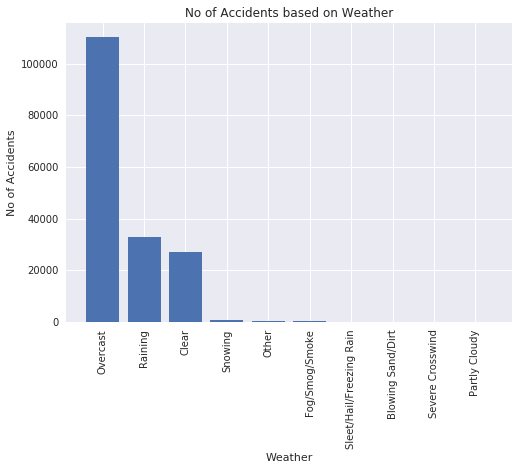

In [33]:

X = Car_Accidents.WEATHER.unique()
Data = Car_Accidents.WEATHER.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Weather')
plt.ylabel('No of Accidents')
plt.title('No of Accidents based on Weather')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

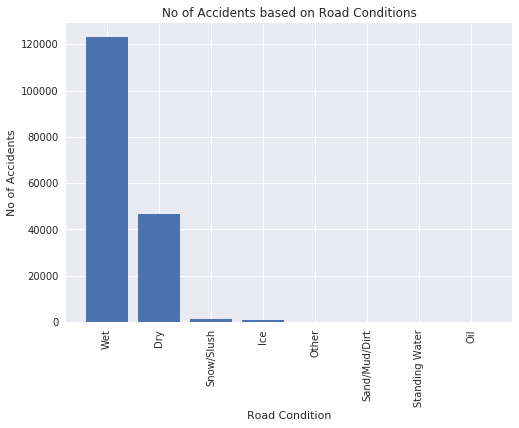

In [34]:
X = Car_Accidents.ROADCOND.unique()
Data = Car_Accidents.ROADCOND.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Road Condition')
plt.ylabel('No of Accidents')
plt.title('No of Accidents based on Road Conditions')
plt.xticks(rotation = 90)

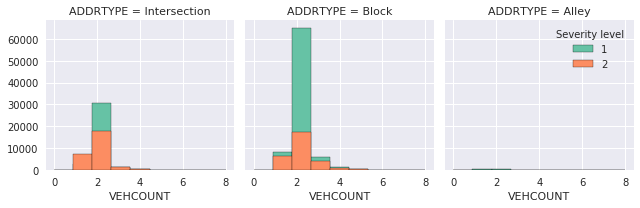

In [35]:

bins = np.linspace(Car_Accidents.VEHCOUNT.min(), 8, 10)
g = sns.FacetGrid(Car_Accidents, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=3)
g.map(plt.hist, 'VEHCOUNT', bins=bins ,ec="k")
g.axes[-1].legend(title="Severity level")
plt.show()

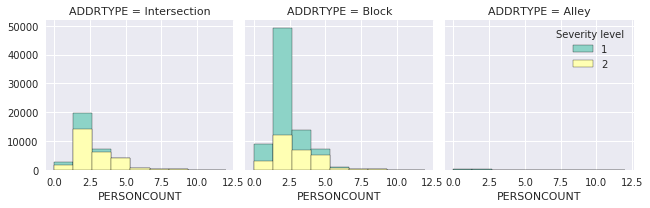

In [36]:
bins = np.linspace(Car_Accidents.PERSONCOUNT.min(), 12, 10)
g = sns.FacetGrid(Car_Accidents, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set3", col_wrap=3)
g.map(plt.hist, 'PERSONCOUNT', bins=bins ,ec="k")
g.axes[-1].legend(title="Severity level")
plt.show()

Here we see that most severe accidents occur on intersections with 2-3 people.



Discussion

At the start of our analysis we were trying to figure out the severity and frequency of road accidents based on weather conditions, road conditions and other factors. Even though our data was a good size, there were a number of missing elements and we needed to clean the data in order to get a good result. We had to drop 'SPEED' factor because there were too many missing elements but I think that is another big factor that should be considered.

Conclusion

Based on our analysis we can clearly see that most severe accidents occur on intersection. Wet road conditions and overcast weather are big contributing factors. These findings can be helpful to the Seattle PD in enforcing some new measures to prevent future accidents.